In [1]:
#グラフ描画ライブラリのインポート
import matplotlib
%matplotlib inline

#数値処理ライブラリのインポート
import numpy as np

#データ処理用のライブラリをインポート
import pandas as pd

#機械学習用アルゴリズムをインポート
import sklearn

#irisのサンプルデータを返り値に持つ関数をインポート
from sklearn.datasets import load_iris

In [2]:
#irisのサンプルデータを変数に代入
iris_datasets = load_iris()

In [3]:
#キーの一覧
iris_datasets.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
#含まれる特徴量
iris_datasets['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
#数値データ
iris_datasets['data']

In [6]:
#データの形
print(iris_datasets['data'].shape)
print('\n150の花についての測定結果が含まれている。')

(150, 4)

150の花についての測定結果が含まれている。


In [7]:
#150の花の品種
print('target:\n{}'.format(iris_datasets['target']))

#数字と花の種類
print('\n0: {[0]}, 1: {[1]}, 2: {[2]}'.format(iris_datasets['target_names'], iris_datasets['target_names'], iris_datasets['target_names']))

target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

0: setosa, 1: versicolor, 2: virginica


In [8]:
#学習データとテストデータの分離（エラーを吐く様ならcross_validation->model_selectionに変更）
from sklearn.cross_validation import train_test_split

#データのシャッフル（ランダムシード固定）
X_train, X_test, Y_train, Y_test = train_test_split(iris_datasets['data'], iris_datasets['target'], random_state=0)

/Users/resnant/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


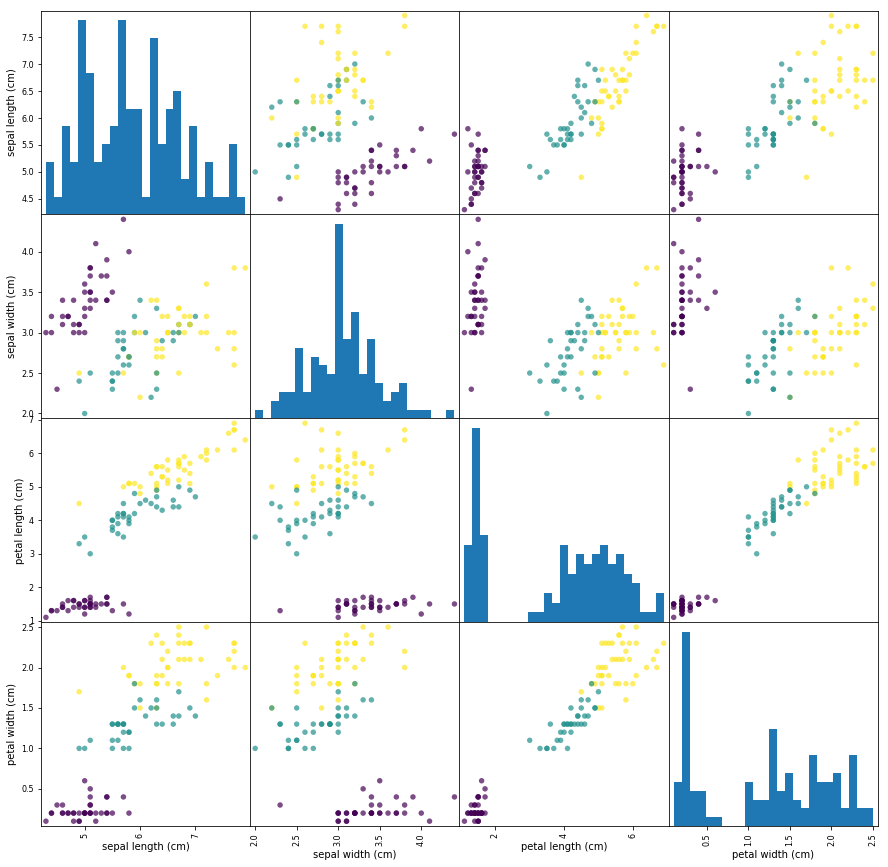

In [14]:
#データの確認
#特徴量同士の分布を見ることで分類が可能かどうかを考える。

#DataFrameの作製
iris_dataframe = pd.DataFrame(X_train, columns=iris_datasets.feature_names)

grr = pd.plotting.scatter_matrix(iris_dataframe, c=Y_train, figsize=(15, 15), marker='o', hist_kwds={'bins':25}, s=30, alpha=.7)

sepalのlength-widthではデータが入り混じっているため分類が困難に思える。

それ以外の変数の組み合わせは直線的に分類が可能に見える。

In [10]:
#k-Nearest Neighborsを使った分類
from sklearn.neighbors import KNeighborsClassifier

#近傍点数1
knn = KNeighborsClassifier(n_neighbors=1)

In [11]:
#モデルの学習
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [12]:
#モデルの評価
y_pred = knn.predict(X_test)

print('テストセットの予測結果:\n{}'.format(y_pred))

テストセットの予測結果:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [13]:
#予測精度
print('test set score: {:.2f}'.format(np.mean(y_pred==Y_test)))
print('test set score: {:.2f}'.format(knn.score(X_test, Y_test)))

test set score: 0.97
test set score: 0.97
